[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/twMr7/Python-Machine-Learning/blob/master/14-Sklearn_Building_A_Machine_Learning_Model.ipynb)

# 14. Sklearn - Building A Machine Learning Model

本章開始進入機器學習（Machine Learning）的領域，會以案例介紹如何運用 Python 的工具套件來實現機器學習。 在學習本章節的內容前，需要先熟悉 Python 的基本容器、Numpy `ndarray`、以及 Pandas `DataFrame` 和 `Series` 的操作，接下來的幾個章節會先以 **Scikit-Learn** 為主，之後會再加入 **tensorflow** 及 **keras** 的介紹：

| 工具函式庫套件      | 網址                                                                    |
|---------------------|-------------------------------------------------------------------------|
| **`numpy`**         | [docs.scipy.org/doc/numpy/](https://docs.scipy.org/doc/numpy/)          |
| **`pandas`**        | [pandas.pydata.org](http://pandas.pydata.org/pandas-docs/stable/)       |
| **`scikit-learn`**  | [scikit-learn.org](https://scikit-learn.org/stable/documentation.html)  |
| **`tensorflow`**    | [www.tensorflow.org](https://www.tensorflow.org/)                       |
| **`keras`**         | [keras.io](https://keras.io/)                       |


+ [**14.1 機器學習的基本認識**](#ml-basic)
+ [**14.2 問題的設定**](#problem-setting)
+ [**14.3 機器學習的模型**](#ml-model)
+ [**14.4 選取特徵資料**](#select-features)
+ [**14.5 用 scikit-learn 建立預測模型**](#build-model)
+ [**14.6 模型確效**](#model-validation)
+ [**14.7 Underfitting and Overfitting**](#underfitting-overfitting)
+ [**14.8 效能可以更好的學習模型**](#random-forest)
+ [**14.9 最終模型的準備**](#final-prepare)
+ [**參考資料**](#references)

### ★ Google Colab 環境必要設定

如果這個 Notebook 是在本地端電腦的 Jupyter 環境下執行的，請跳過這個步驟。

如果你看不到 *14.1* 的手寫數字的圖片，請改點選這個 Notebook 最上面的 "Open In Colab" 的連結圖示，以重新開啟這個 Notebook。

由於這個 Notebook 會使用到外部檔案，但在 Google Colab 上的執行環境是在雲端的虛擬機器，工作目錄下會找不到需要的檔案，需要先掛載 Google 雲端硬碟。

執行掛載的程式碼後，按照以下步驟：
1. 點選畫面上輸出的連結。
2. 選取個人帳號，檔案所在的雲端硬碟的帳號。
3. 複製授權碼，貼到 "Enter your authorization code" 訊息下的輸入框中，按 Enter 鍵。

In [ ]:
from google.colab import drive
# 掛載個人帳號的雲端硬碟到 /content/drive 下
drive.mount('/content/drive')

掛載 Google 雲端硬碟後，接下來要建立所需目錄`"dataset"` 的連結，會用到以下的 Linux 指令：

- **`ls`** - 列出指定路徑下的檔案及目錄。
- **`ln`** - 建立檔案或目錄的連結。

注意，雲端硬碟的根目錄是 `"My Drive"`，根目錄後的路徑每個人不見得一樣，請修改成你所使用的正確路徑。


In [ ]:
!ln -svf 'drive/My Drive/Lecture/Python Machine Learning/dataset' dataset

<a id="ml-basic"></a>

## 14.1 機器學習的基本認識

一般而言，機器學習關心的是要如何從已知的資料中，建構一個可以用來預測未知資料特性的模型。 執行學習的任務使用電腦系統的演算法來***自動發現數據的規律性***，稱為模式識別（Pattern Recognition）。 所以機器學習演算法的設計，所關心的是如何識別資料中隱含的模式來作推論，而不是明確指示推論的邏輯。

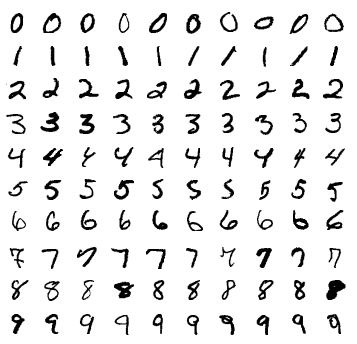

以著名的 [MNIST](http://yann.lecun.com/exdb/mnist/) 手寫辯識資料庫為例。每一個數字是 28x28 個像素的影像，也就是要從 784 個實數的向量資料中，辨識出所代表的 0, 1, 2, ..., 9 的正確數字。 要達到接近人類辨識的正確率，用手工打造（hand-engineering）辨識的特徵及規則非常的困難。 透過機器學習的方法可以取得比手工打造規則還要好的結果，甚至於超越人類辨識的正確率。

機器學習的手法是使用足夠大的資料集 $X$ 來調整匹配模型的參數，這個資料集稱為 **訓練集（training set）**。 每筆資料（影像）的類別（數字）都已經事先知道，並且在資料集裡都有對應欄位作標籤註記（正確答案是那個數字），我們稱為標籤向量或目標向量 $y$。 所執行的機器學習演算法可以表示為 $y = f(X)$，確切的 $f(X)$ 函數模型則是透過 **訓練（training）** 的過程來決定，這個過程也稱為 **學習（learning）**。 模型經過訓練後可以用來推論判斷訓練過程沒見過的新資料，稱為 **測試集（test set）**，足以正確判斷分類新資料的能力稱為 **泛化（generalization）**，設計具備足夠泛化能力的演算法就是機器學習的主要目標。

上述應用方式的機器學習問題： 輸入學習的訓練集資料，包含了要學習的目標向量； 這種方式稱為 **監督式學習（supervised learning）**。 從手寫數字的影像辨識成有限數量的 0 到 9 的數字類別，這樣的問題稱為 **分類（classification）** 問題。 假如問題輸出的目標包含一個或多個連續數值的變量，則稱為 **回歸（regression）**。

另外有一種 **非監督式學習（unsupervised learning）** 的方式，使用的訓練集資料沒有包含任何對應的目標向量，而學習的目標則是從資料集中探索如何將類似的觀察資料分門別類，稱為 **聚類（clustering）**。

<a id="problem-setting"></a>

## 14.2 問題的設定

以下機器學習的範例使用 Kaggle 的 [House Prices 房價預測競賽資料集](https://www.kaggle.com/c/home-data-for-ml-course/data)，講義部分內容節錄自 Kaggle 的 [*Intro to Machine Learning*](https://www.kaggle.com/learn/intro-to-machine-learning) 微學習課程。

房價資料集包含了 79 個描述美國愛荷華州埃姆斯市（Ames, Iowa）的住宅的解釋變量，用來預測每個房子的最終價格。 這個競賽分別提供了一個訓練集以及一個測試集，訓練集包含了房價的標籤欄位，測試集則是用來輸出預測結果上傳至競賽區，標準的監督式學習及回歸問題。

任何機器學習專案的第一個步驟都是要先熟悉取得的數據，Pandas 非常適合用來執行探索數據的任務。

In [1]:
import numpy as np
import pandas as pd

# 載入 House Prices 資料集
train_data = './dataset/HousePrices/train.csv'
X_full = pd.read_csv(train_data, index_col='Id')

In [2]:
# 基本檢視
print('House Prices 資料集共 {}列 x {}欄\n'.format(*X_full.shape))
print('所有欄位標籤：\n', X_full.columns, '\n')
print('所有列序號標籤：\n', X_full.index, '\n')
X_full.head()

House Prices 資料集共 1460列 x 80欄

所有欄位標籤：
 Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual'

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# 敘述統計摘要，注意：只有數值欄位
X_full.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### § 基本摘要

從上面的基本摘要中可以注意到：
+ 最後一欄 `SalePrice` 是數據模型的標準答案，用來作監督式學習的 Y （又稱註記標籤，label），其他欄位則都是候選的 X 特徵欄位。
+ 輸入為 1460 列的數據，列出前五筆資料就有出現 NaN 的漏失數據； 敘述統計摘要中的 `count` 也可以看出來，某些數值欄位的總筆數沒有達到 1460。
+ 有不少數值欄位的值以 0 居多，這些應該是只有高價位房子才會有值出現的。
+ 除了數值以外，其他的欄位都是類別型（categorical）的資料。
+ 資料集的 `data_description.txt` 有各欄位的說明及欄位值的定義。
+ ...（請盡情發揮你的好奇心）

後面的章節中會進一步介紹漏失數據及類別資料的處理手法。

In [4]:
"""
Note: 通常會習慣將包含向量資料的變數用大寫的字首命名，純量則全部用小寫。
      但機器學習裡時常全部都是向量式的資料，所以另外一種命名習慣是：
      * 字首大寫 - 二維以上的陣列資料
      * 全部小寫 - 一維的向量資料
"""

# 先將標準答案欄位 Y 取出
y = X_full['SalePrice']

<a id="ml-model"></a>

## 14.3 機器學習的模型

機器學習的模型怎麼學習？ 模型怎麼使用？ 我們先用決策樹（[decision tree](https://en.wikipedia.org/wiki/Decision_tree_learning)）的模型來作說明。 用決策樹建立的房價預測模型不會是最精準的，但演算法類似人的決策方式，學習的過程及結果比較容易被人理解，而且有些先進的機器學習模型就是建構在決策樹的基礎之上。

你會怎麼預測房價？ 許多人可能會從幾房幾廳開始切割價位的差別。 例如兩房以上的房價當成一個決策的分隔點，決策樹就以這個決策分出兩個分支的節點，一邊是兩房或以下的歷史平均房價，另一邊則是兩房以上的歷史平均房價。 從歷史觀察數據中決定如何將房價區分成兩群，然後一樣從數據中決定兩群的預測房價，這樣從數據中擷取特徵模式的步驟就是模型的 **匹配（fitting）** 或 **訓練（training）** 的過程，用來匹配模型的資料集我們稱為 **訓練集（training set）**。

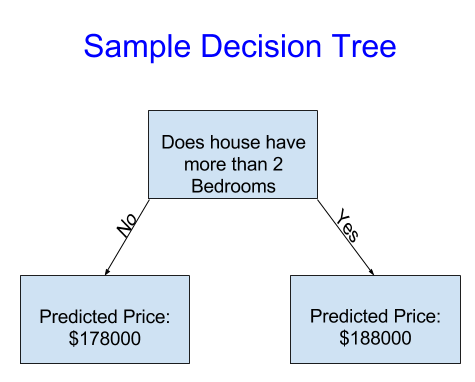

光用兩房以上作區隔顯然太過粗糙了，還有許多其他用來描述房子的數據可以讓預測更準確，例如地坪大小、地點、屋齡 ... 等。 當納入越來越多的因素，決策樹就會越分越多決策的分支，樹就會長越廣越高（深）。

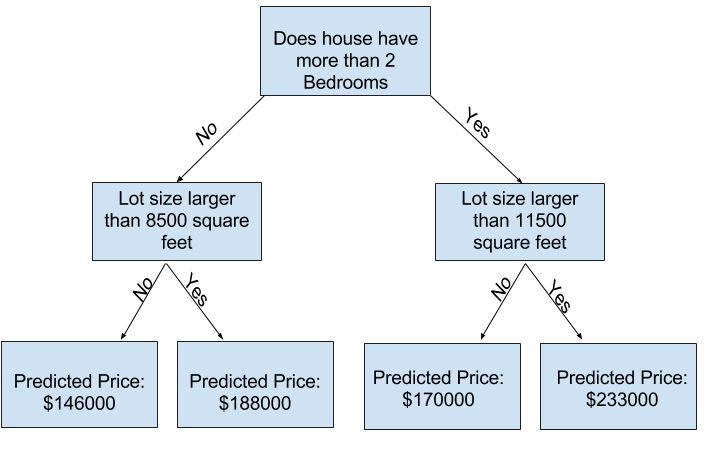

要使用訓練後的決策樹模型作預測，就由根節點開始，依循資料中相同的特徵決策路徑，一直往下追蹤到最末端的某個葉節點（leaf node）為止，就是根據資料特徵所決定的最終預測結果。

<a id="select-features"></a>

## 14.4 選取特徵資料

House Prices 資料集中共有 79 個房屋特徵描述欄位，有數值欄位也有類別型欄位。 決策樹會根據某種分支指數的計算結果決定每個特徵的決策力，以決定某個節點的最佳分支特徵。 不是所有的欄位都具有相同的預測決策力，也不是同一個特徵在不同節點都具有相同的決策力，使用所有的欄位與使用部分欄位的訓練結果也不會一樣。

+ ***要使用哪些欄位才能建立最有預測能力的模型呢？***
+ ***要怎麼選擇特徵欄位呢？***

最簡單直接的方法就是每一種組合都試試，看那一種組合的預測結果最好。 但是 79 個欄位就有 $2^{79}$ 種組合需要試，況且這還不算是大型的資料集。 就算窮盡所有組合得到的結果，決策樹模型所選出來的特徵並不能適用於其他機器學習模型。

針對特徵的處理手法，在後面的章節會再另外獨立介紹，以下先以直覺選取部分特徵欄位來建立決策樹的模型。

In [5]:
# 特徵欄位
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
# 用來訓練模型的特徵欄位資料 X
X = X_full[features]
# 再檢視基本數據
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
1,8450,2003,856,854,2,3,8
2,9600,1976,1262,0,2,3,6
3,11250,2001,920,866,2,3,6
4,9550,1915,961,756,1,3,7
5,14260,2000,1145,1053,2,4,9


<a id="build-model"></a>

## 14.5 用 `scikit-learn` 建立預測模型

決策樹的模型在 scikit-learn 的 [`tree`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree) 模組裡，包含了用於分類的 `DecisionTreeClassifier` 類別以及用於回歸的 `DecisionTreeRegressor` 類別。 預測房價屬於回歸的問題，要產生 [**`DecisionTreeRegressor`**](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) 的物件，然後使用物件的 `fit()` 方法來訓練回歸樹的決策模型。 通常會經過以下步驟：
1. 定義問題 - 是分類還是回歸？ 問題適合什麼樣的模型。
2. 訓練（`fit`） - 讓模型的演算法學習數據的特徵模式。
3. 預測（`predict`） - 使用訓練過的模型來預測新的量測資料。
4. 評估（evaluate） - 判斷模型的準確度，有多少預測能力。


In [6]:
# scikit-learn 的 Python 套件名字是 sklearn
from sklearn.tree import DecisionTreeRegressor

# 初始化模型物件，參數都先使用預設值
dtree_model = DecisionTreeRegressor()

# 用 fit 方法開始訓練模型
dtree_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### § 進行預測並評估結果

使用模型物件的 `predict()` 方法作預測，記錄預測的結果後，與正確答案比較來計算預測的誤差值。 另外，scikit-learn 的回歸模型也有提供 `score()` 方法返回 [$R^{2}$ 決定係數](https://en.wikipedia.org/wiki/Coefficient_of_determination) 的分數，這個係數在統計上被用來評估模型與量測數據有多大的符合性，所以如果模型的訓練結果學習不到資料的特徵模式，$R^{2}$ 係數值一定高不了。 但不能反過來判斷，如果 $R^{2}$ 值高到接近 1 的話，不代表模型就有很好的預測能力，所以切記不能依此係數判斷模型學習的準確性。[[參閱](http://amebse.nchu.edu.tw/new_page_535.htm)]

In [7]:
# 用訓練資料集作預測，看看訓練的結果？
predictions = dtree_model.predict(X)

# 計算平均絕對誤差（mean absolute error）
mae = np.fabs(y - predictions).mean()

print('訓練集平均絕對誤差 =', mae)
print('R-square 係數 =', dtree_model.score(X, y))

訓練集平均絕對誤差 = 62.35433789954339
R-square 係數 = 0.9999346278363472


<a id="model-validation"></a>

## 14.6 模型確效 Model Validation

建了模型也訓練完了，怎麼知道這個模型好不好？ 必須要有個效力的度量方法來確認所訓練模型的預測品質，這是能不能持續改進模型的關鍵。

我們希望的是模型預測得越準越好，所以預測準確度是一個評估的標準。 在回歸的模型裡，平均絕對誤差（Mean Absolute Error）、均方差（Mean Square Error）、或均方根差（Root Mean Square Error）都是常用的度量指標，Scikit-learn 提供了不少常用的度量指標在 [`sklearn.metrics`](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) 模組裡。

但上一個範例的模型在訓練完以後，使用訓練集來量測預測結果的誤差，這其實是個錯誤的示範。 機器學習希望建立的是能夠預測真實世界資料（real-world data）的模型，我們只能從有限的取樣資料中來擬合真實世界的模型，所以可以預期的是，實際進行預測的資料不會跟用來訓練的資料一模一樣。 用訓練集的資料來度量預測品質的結果只是個假象，因為訓練過程模型始終只看到取樣自訓練集的資料模式，這樣的度量分數沒有顯示真實世界的預測能力。 這就好像考試前老師提供有答案的練習題給學生作練習，結果考試出的題目跟練習題一模一樣，背答案的學生跟真的會的學生分數差不多，這樣沒有鑑別力的分數沒有任何意義。

既然真實狀況是模型會使用沒看過的新資料來作預測，模型準確度的評估應該使用另外一個（不是用來訓練模型的）資料集。 機器學習裡通常的做法就會把訓練資料集分成兩份，取 80% 當作訓練集（training set），另外 20% 與訓練過程隔離的當作確效驗證集（validation set），準確度的評估會只針對確效驗證集。 Scikit-learn 在 [`sklearn.model_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) 模組裡，提供了一個方便切割並隨機取樣指定比例的函式 [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)。 你會發現這樣的評估結果準確率變差了，但是這才是真實狀況的分數。


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

train_X, valid_X, train_y, valid_y = train_test_split(X, y, train_size=0.8, test_size=0.2)

# 初始化新的模型物件，參數都先使用預設值
dtree_model2 = DecisionTreeRegressor()
# 使用 train_X, train_y 訓練模型
dtree_model2.fit(train_X, train_y)

# 使用 valid_X, valid_y 評估預測準確度
valid_predicts = dtree_model2.predict(valid_X)

mae = mean_absolute_error(valid_y, valid_predicts)

print('平均絕對誤差 =', mae)
print('R-square 係數 =', dtree_model2.score(valid_X, valid_y))

平均絕對誤差 = 31988.74315068493
R-square 係數 = 0.5899971585879775


<a id="underfitting-overfitting"></a>

## 14.7 Underfitting and Overfitting

前面介紹了怎麼使用 training set 來建模型，接著用 validation set 來評估準確度。 然後評估的結果不太理想怎麼辦呢？ 

調整建模的參數應該會有幫助。 之前的範例都只使用預設參數，事實上 [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) 有相當多的參數可以調整。 對決策樹來說，最重要的就是控制樹的高度以及分支品質了，而預設的參數是讓樹儘量長大沒有作限制也沒有修剪。 決策樹是二元分支樹，從根節點到某個葉節點經過 10 個分支在實務上算很常見。 一個分支會將資料集分成 2 群，分別再分支就變 4 群，假設樹是長滿的沒有歪斜的，那高度 10 的樹會分出 $2^{10}$ 群，共 1024 個葉節點。 可以預期的是，當樹越長越高後，資料集經過許多分支後的葉節點會只剩少少的幾間房子。 用非常少量的房子樣本來預測房價，結果會非常接近那幾個房子的真實房價，但用來預測沒見過的新資料反而會有比較大的偏差。

這種現象我們稱之為 [**overfitting**](https://en.wikipedia.org/wiki/Overfitting)，指的是模型訓練結果可以與訓練集完美匹配，但是在確效驗證或測試新資料時誤差確很大。 既然如此，那樹長得矮矮的，不要分太多群就可以解決了吧？ 我們先看看極端一點的例子，只有分兩群的樹最矮，每一群裡都還保留了很多各式各樣的房子，這樣就算是預測訓練集的結果也會偏離真實房價很多。 當模型沒能擷取到資料的特徵模式，就連訓練集的資料都學不好時，這樣的現象我們稱為 **underfitting**。

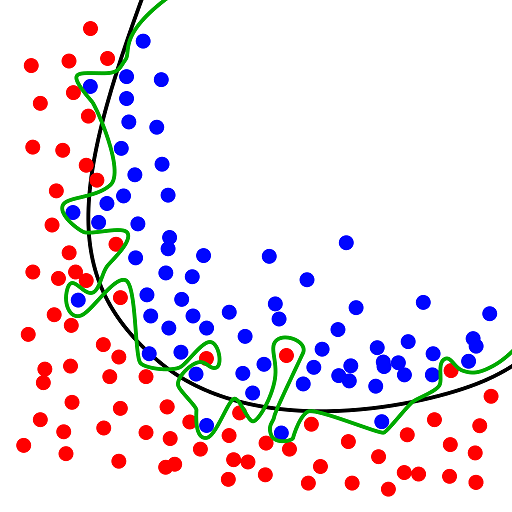

樹長得太高會 overfitting，長得太矮會 underfitting，那長多少才比較剛好？ 還是要回過頭看看確效驗證時的正確度，通常透過觀察訓練和確效驗證的誤差，可以發現如圖的現象。 當調整模型學習的參數讓匹配的誤差越來越小，一開始顯然還是 underfitting 時，確效驗證結果的誤差也會越來越小，一旦出現 overfitting 現象後，確效驗證結果的誤差會變得越來越大。所以希望能找到介於 under 與 over 之間，最適的 best fit 點的參數。

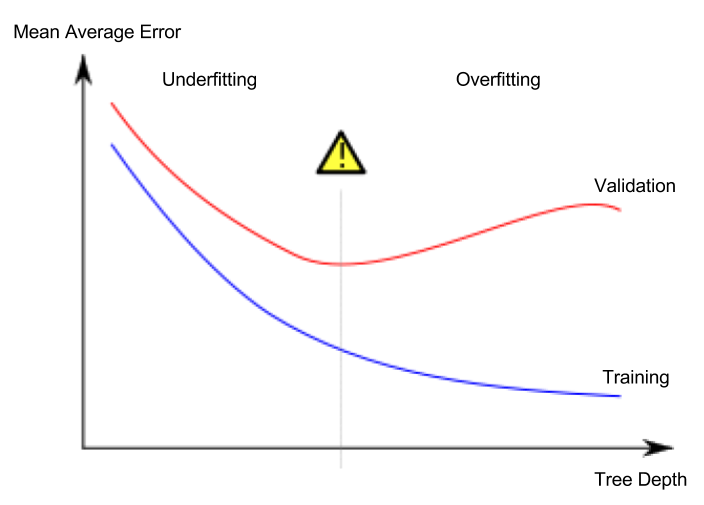

### § 搜尋最適模型參數

有幾個 `DecisionTreeRegressor` 的參數都會影響最後決策樹的高度： `max_depth`、`min_samples_leaf`、`max_leaf_nodes` ... 等。 調整允許生成的最大葉節點數量看起來是個合理的控制方式；葉節點樹越大，訓練結果就會越往 overfitting 的那一邊移動。 所以透過由小到大調整最大葉節點數量，重複執行訓練模型、確效驗證、然後記錄預測誤差指數，希望可以找到比較適合的參數，使得訓練出來的模型在 training 和 validation 都可以匹配得不錯。


In [9]:
# 定義 get_mae 工具函數來協助重複執行 MAE 的比較
# 注意： 設定 random_state 固定隨機的 seed，每次訓練的結果才會比較一致
def get_mae(max_leaf_nodes, train_X, valid_X, train_y, valid_y):
    #model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes)
    model.fit(train_X, train_y)
    valid_predicts = model.predict(valid_X)
    mae = mean_absolute_error(valid_y, valid_predicts)
    return mae

In [10]:
# 候選的 max_leaf_nodes 參數集
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
# dict comprehension
mae_scores = {leaf_size: get_mae(leaf_size, train_X, valid_X, train_y, valid_y) for leaf_size in candidate_max_leaf_nodes}
mae_scores

{5: 37740.739641643326,
 25: 28455.44113032674,
 50: 27364.15898893304,
 100: 26860.077998806042,
 250: 28277.117451662452,
 500: 31094.515709936943}

透過 [`min`](https://docs.python.org/3/library/functions.html#min) 找到最低 MAE 當次所用的參數值，`min` 的 `key` 參數可以指定一個用 key 取值的函數，對 dict 容器而言，可以使用 [`dict.get`](https://docs.python.org/3/library/stdtypes.html#typesmapping)。

In [11]:
# 找到最低 MAE 當次所用的參數值
best_tree_size = min(mae_scores, key=mae_scores.get)

# 候選名單中的最適參數值
print('最適參數值 =', best_tree_size)

最適參數值 = 100


<a id="random-forest"></a>

## 14.8 效能可以更好的學習模型

上面範例中，透過調整最大葉節點數量來儘可能避開 overfitting 的模型，其實是眾多可調參數中的其中一個而已。 深入眾多的可調參數空間中作調整，決策樹還是難免糾結在難以決策的問題上： 樹太高分支太多會 overfitting，樹太矮分支太少會 underfitting。 這對現今大部份的先進學習模型來說，也還是個需要有效折衷取捨的問題。 但是有不少學習模型採取了聰明的策略而因此取得較好的效能，**隨機森林（Random Forest）**就是其中一種。

隨機森林建很多很高的決策樹，每棵樹或許都是高偏差過擬合的，但透過眾議決來平均多棵樹的預測，結果可以取得比較穩健、泛化程度較佳、較不容易 overfitting 的效能。 而且，通常預設參數就可以取得明顯優於單一決策樹的學習模型。

隨機森林的模型在 scikit-learn 的 [`ensemble`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) 模組裡，包含了用於分類的 `RandomForestClassifier` 類別以及用於回歸的 [**`RandomForestRegressor`**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) 類別。

In [12]:
from sklearn.ensemble import RandomForestRegressor

# 初始化隨機森林模型物件
rforest_model = RandomForestRegressor()
# 使用 train_X, train_y 訓練模型
rforest_model.fit(train_X, train_y)
# 使用 valid_X, valid_y 評估預測準確度
rf_valid_predicts = rforest_model.predict(valid_X)

mae = mean_absolute_error(valid_y, rf_valid_predicts)
print('平均絕對誤差 =', mae)
print('R-square 係數 =', rforest_model.score(valid_X, valid_y))

平均絕對誤差 = 22786.090296803653
R-square 係數 = 0.8008165178396516


C:\RnD\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<a id="final-prepare"></a>

## 14.9  最終模型的準備

模型經過正確的確效驗證程序，也找出最適合的參數避免 overfitting 後，基本動作大致都完成了。 不管接下來是預測測試集，或是實際預測真實世界的資料，在準備部署模型之前可以納入所有的資料來訓練最終模型，這時已經不需要再區分 training set 和 validation set 了。

In [13]:
# 準備最終模型，你要用那一種學習模型？
final_model = RandomForestRegressor()
# 使用所有可以用的訓練資料來訓練最終模型
final_model.fit(X, y)

C:\RnD\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### § 上傳競賽

針對 Kaggle 提供初學者的 [房價預測競賽](https://www.kaggle.com/c/home-data-for-ml-course/)，我們需要使用訓練好的模型對測試集作預測，然後將預測結果按照指定的格式（如以下表格的 csv 檔）上傳。

| Id     | SalePrice   |
|--------|-------------|
| 1461   | 169000.1    |
| 1462   | 187724.1233 |
| 1463   | 175221      |
| ...    | ...         |

In [ ]:
# 讀取測試集
test_data = './dataset/HousePrices/test.csv'
X_test_full = pd.read_csv(test_data)

# 取跟訓練集相同的欄位
X_test = X_test_full[features]
# 從測試集作預測
test_predicts = final_model.predict(X_test)

# 輸出成競賽要求格式
output = pd.DataFrame({'Id': X_test_full.Id, 'SalePrice': test_predicts})
output.to_csv('submission.csv', index=False)

### *上傳看看競賽成績 ...*

<a id="references"></a>

## References:

+ Christopher M. Bishop, *"Pattern Recognition and Machine Learning"*, Springer, 2006.
+ Dan Becker, *"Intro to Machine Learning"*, Kaggle, 2019. [[link]](https://www.kaggle.com/learn/intro-to-machine-learning)